# K Nearest Neighbours
The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms mainly used for classification.



KNN simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

## Methods used in this notebook
1. Sci-kit Learn
2. Euclidean distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Understanding Data

In [2]:
data = pd.read_csv("datasets/iris.csv")

In [3]:
data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [5]:
data.describe

<bound method NDFrame.describe of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

## Visualize Data 

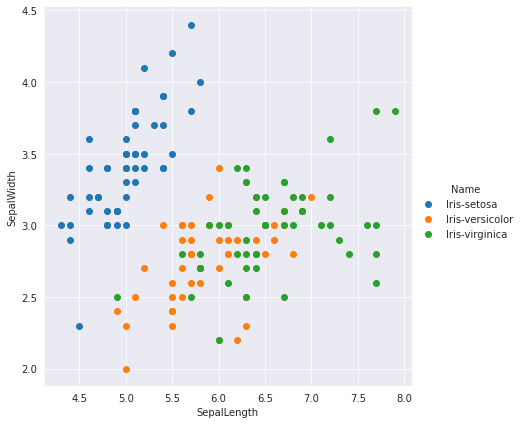

In [6]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="Name", height=6).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plt.show()

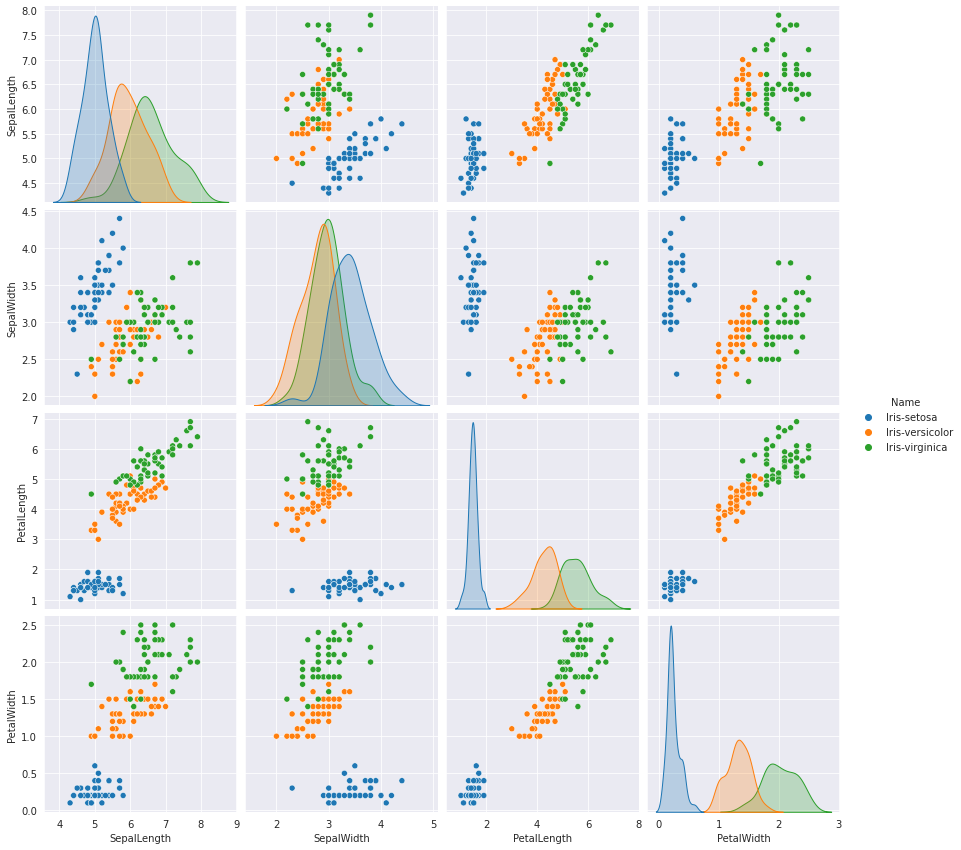

In [7]:
sns.set_style("darkgrid");
sns.pairplot(data, hue="Name", height=3);
plt.show()

<AxesSubplot:>

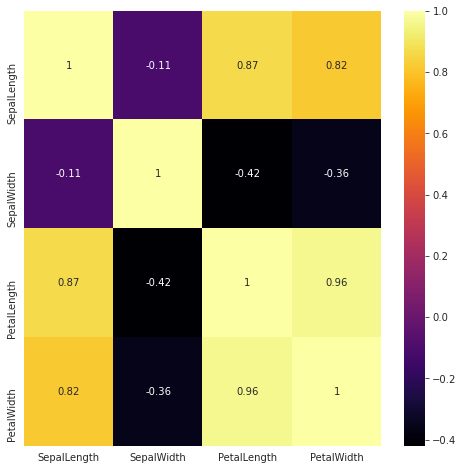

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

We can see that Petal length, petal width and Sepal length are the features which can separate the data very well.


In [9]:
X = data[['SepalLength', 'PetalLength', 'PetalWidth']].values
y = data.iloc[:, 4]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Choosing Optimal K

### Plotting graph for Error Rate vs K-value

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

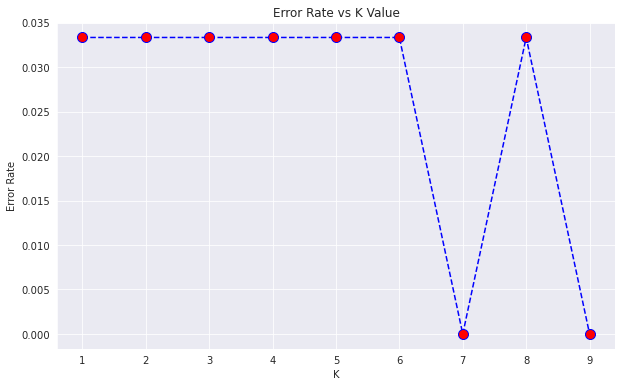

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Plotting graph for Training and Testing Accuracy separately 

In [14]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

In [15]:
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)

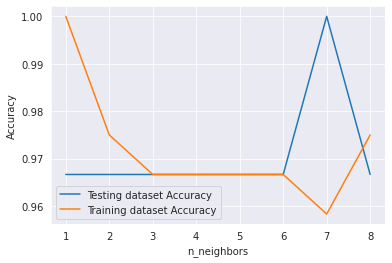

In [16]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

Taking K as 5.

## KNN Using Sci-kit Learn

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X1 = scaler.transform(X_train)
X1_t = scaler.transform(X_test)

### Training

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X1, y_train)

KNeighborsClassifier()

### Predictions

In [19]:
y_pred = classifier.predict(X1_t)

### Evaluating

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]


In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## KNN Using Euclidean Distance from Scratch
1. Calculate Euclidean Distance
2. Get Nearest Neighbors
3. Make Predictions

In [23]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

### Get Data

In [24]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            dataset.append(row)
    return dataset

In [25]:
filename = "datasets/iris.csv"
dataset = load_csv(filename)

In [26]:
dataset = dataset[1:]

### Converting columns to float

In [27]:
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [28]:
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)

### Calculating Euclidean Distance
Euclidean Distance = $\sqrt{\sum _1 ^N (x1_i – x2_i)^2}$

Where x1 is the first row of data, x2 is the second row of data and i is the index to a specific column as we sum across all columns.

In [29]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

### Get Nearest Neighbors
* Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.
* Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

In [30]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

### Defining KNN Algorithm

In [31]:
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [32]:
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

### Feature Scaling
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [33]:
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

In [34]:
minmax = dataset_minmax(dataset)

## $\frac{x - min(x)}{max(x) - min(x)}$

In [35]:
# Rescaling data in the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])


In [36]:
normalize_dataset(dataset, minmax) 

### Convert labels to integer

In [37]:
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [38]:
str_column_to_int(dataset, len(dataset[0])-1)

{'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}

### Predictions

In [39]:
num_neighbors = 5

In [40]:
row = [4.5, 2.3, 1.3, 0.3]

In [41]:
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

Data=[4.5, 2.3, 1.3, 0.3], Predicted: 1


### Evaluating the algorithm

**cross validation split**

In [42]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

**Accuracy Percentage Function**

In [46]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

**Evaluating**

In [47]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [48]:
n_folds = 5

In [49]:
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)

Scores: [90.0, 96.66666666666667, 100.0, 100.0, 93.33333333333333]


In [50]:
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Mean Accuracy: 96.000%
